# The Spark Foundation
# GRIP SEP 2023 
Name :- SUSHANT SHEKHAR DASHPUTE

Domain:- Data Science & Business Analytics

Task_1= Prediction using supervised machine learning

Problem Statement:-
predict the percentage of students based on No. of study hours    
    

In [3]:
#Importing all required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from math import sqrt

In [4]:
#Reading data from link 
url="http://bit.ly/w-data"
stu_data=pd.read_csv(url)

print("Data imported successfully")
stu_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The Average study hours of students is 5.012

The Average score is 51.48

In [6]:
# To check whether null values are present or not
stu_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

From the output we can observe that there are no null values present in the data

**Visualizing Data** :

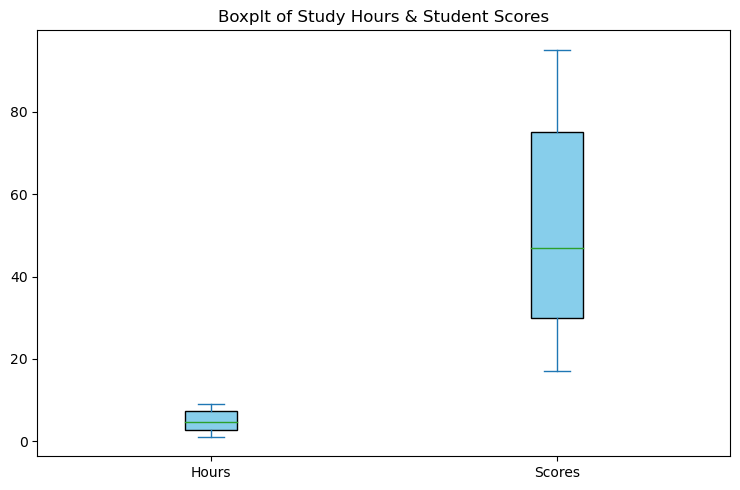

In [7]:


plt.rcParams["figure.figsize"]=[7.5,5]
plt.rcParams["figure.autolayout"]=True

boxplot=stu_data[["Hours","Scores"]].plot(kind="box",title="Boxplt of Study Hours & Student Scores",patch_artist=True
                                          ,boxprops={"facecolor":"skyblue","edgecolor":"black"})


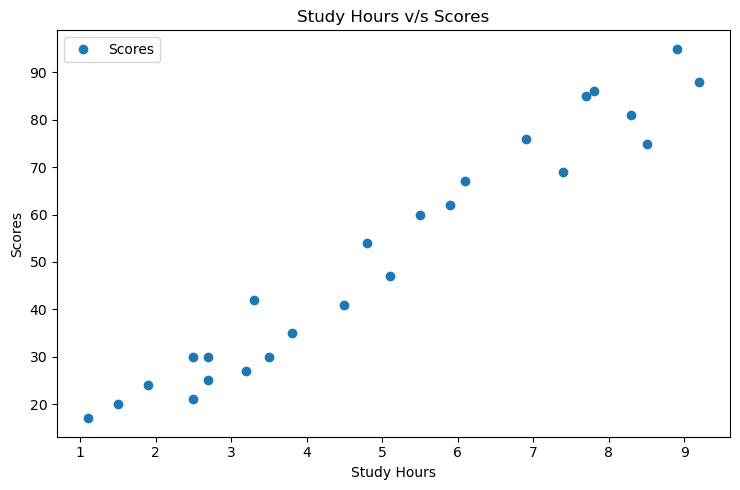

In [8]:
#Plotting the distribution of scores
stu_data.plot(x="Hours",y="Scores",style="o")
plt.title("Study Hours v/s Scores")
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.show()


**Conclusion** : From the above graph we can see that there is highly positive linear relationship between study Hours and socres obtained by sudents

# Checking Normality Of Data

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([1.1, 1.5, 1.9, 2.5, 2.5, 2.7, 2.7, 3.2, 3.3, 3.5, 3.8, 4.5, 4.8,
         5.1, 5.5, 5.9, 6.1, 6.9, 7.4, 7.7, 7.8, 8.3, 8.5, 8.9, 9.2])),
 (2.583577905087343, 5.012, 0.9789402086868313))

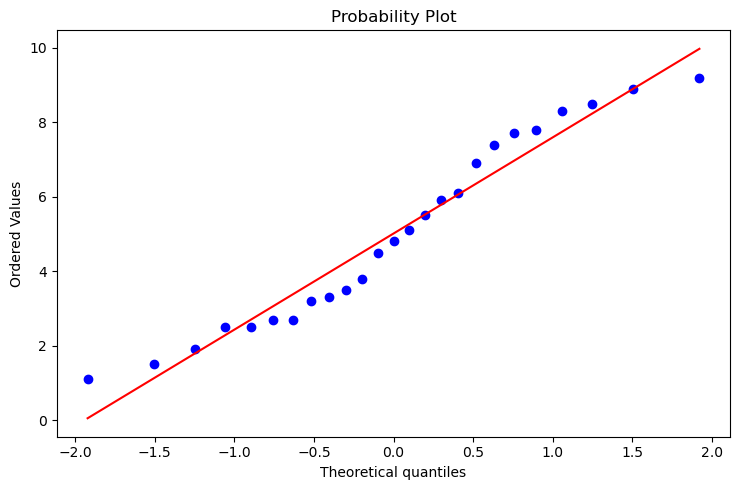

In [9]:
#By Graphical representation
#For Study_Hours
stats.probplot(stu_data["Hours"],plot=plt)

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([17, 20, 21, 24, 25, 27, 30, 30, 30, 35, 41, 42, 47, 54, 60, 62, 67,
         69, 75, 76, 81, 85, 86, 88, 95], dtype=int64)),
 (25.58038152298867, 51.47999999999999, 0.9678851140595))

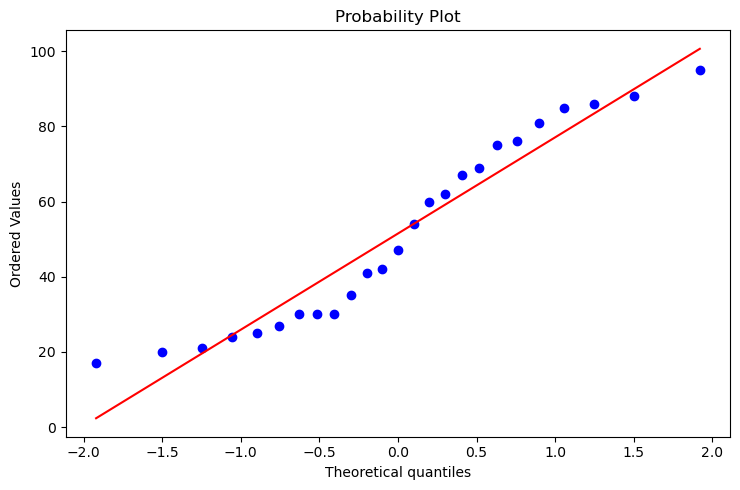

In [10]:
#For Scores
stats.probplot(stu_data["Scores"],plot=plt)

# Checking Normality by Statistical test

Ho:Data is distributed Normally
    
H1:Data is not distributed normally
    

In [11]:
# We use shpairo-wilk normality test as there are less than 50 observations
stats.shapiro(stu_data["Hours"])

ShapiroResult(statistic=0.9401377439498901, pvalue=0.1491193175315857)

In [12]:
stats.shapiro(stu_data["Scores"])

ShapiroResult(statistic=0.9168438911437988, pvalue=0.04343847185373306)

**Conclusion**: 

1] Hours = Here we can see that the p_value=0.149 which is greater than level of significance value (0.05) therefore we may accept Ho at 5% l.o.s and we can say that the data is normally distributed.

2] Scores = Here we can see that the p_value=0.149 which is greater than level of significance value (0.01) therefore we may accept Ho at 1% l.o.s and we can say that the data is normally distributed. 

# Correlation between Study Hours & Student Scores

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<AxesSubplot:>

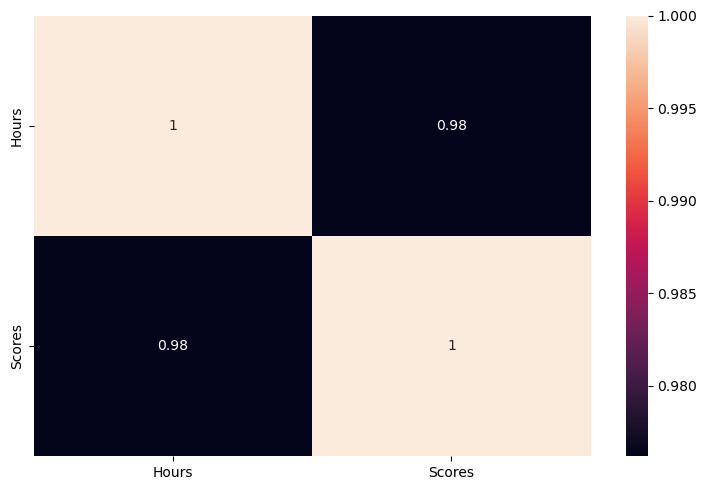

In [13]:
Correlation = stu_data.corr()
print(Correlation)

#visualizing correlation by heatmap

sns.heatmap(Correlation,annot=True)


**Conclusion**:- Thus we may say that there is highly positive correlation between Study Hours & Student Scores

# Preparing the data 

In [14]:
x=stu_data.iloc[:, :-1].values
y=stu_data.iloc[:,1].values

# Splitting data into training and testing :- 

Here the independent variable is "Study Hours" and dependent variable is "Student Scores"

To make predictions about the scores obtained based on number of study hours we will run train test split method where we are going to divide our dataset in 8:2 ratio

Here 80% is the training dataset through which we are going to mae predictions .


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
reg= LinearRegression()
reg.fit(x_train,y_train)

print('Training Completed')


Training Completed


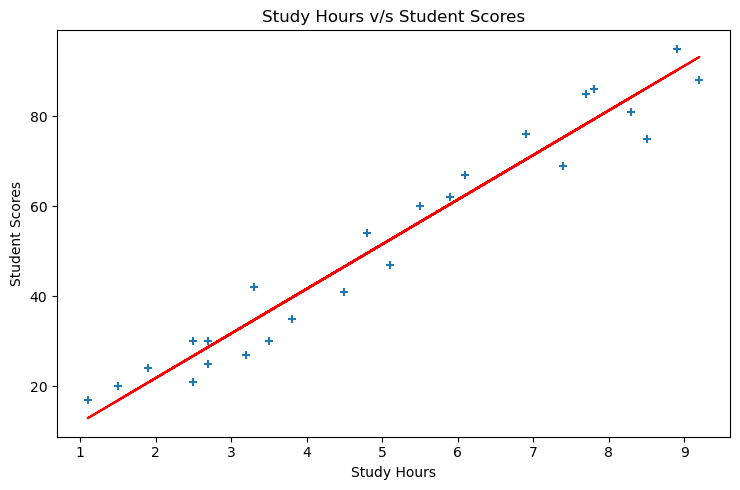

In [17]:
# Plotting Regression line
line = reg.coef_*x+reg.intercept_

#plotting for the test data

plt.scatter(x,y,marker='+')
plt.plot(x,line,color='red')
plt.title("Study Hours v/s Student Scores")
plt.xlabel("Study Hours")
plt.ylabel("Student Scores")
plt.show()

# Prediction

In [18]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Actual V/s Predicted

In [19]:
y_pre=reg.predict(x_test)
df = pd.DataFrame({ "Actual Value" : y_test , "Predicted Value" : y_pre})
df

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the scores if student studies for 9.25 hours/day

In [20]:
Hours=9.25
pred = reg.predict([[Hours]])
print("If the student Study for",Hours,"Hours daily","then score will be ",pred)

If the student Study for 9.25 Hours daily then score will be  [93.69173249]


# Evaluating the Model

In [25]:
#By using the mean absolute error
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pre))

Mean Absolute Error: 4.183859899002975


# Predicting the scores for user input


In [27]:
Hours=float(input("Enter the Study Hours:"))
pred = reg.predict([[Hours]])
print("If the student Study for",Hours,"Hours daily","then score will be ",pred)

Enter the Study Hours:5
If the student Study for 5.0 Hours daily then score will be  [51.57144244]


# Thank You